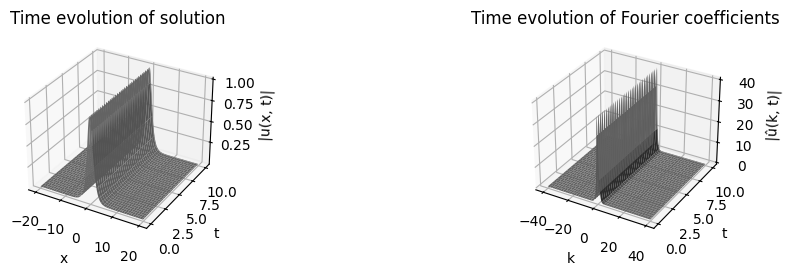

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def nls_rhs(ut0, t, k, n):
    ut= ut0[0:n] + 1j*ut0[n:]
    u = np.fft.ifft(ut)
    rhs = -(1j/2) * (k**2) * ut + 1j * np.fft.fft((np.abs(u)**2) * u)
    return np.hstack([np.real(rhs),np.imag(rhs)])

L = 40
n = 512
x2 = np.linspace(-L/2, L/2, n+1)
x = x2[:n]
k = (2*np.pi/L) * np.concatenate((np.arange(0, n//2), np.arange(-n//2, 0)))

# time
t = np.arange(0, 10.1, 0.1)

# initial conditions
N = 1
u = N * np.cosh(x)**(-1)
ut = np.fft.fft(u)
ut0= np.hstack([np.real(ut),np.imag(ut)])

utsol = odeint(nls_rhs, ut0, t, args=(k,n,))
usol = np.zeros((len(t), n), dtype=np.complex128)
usol2 = utsol[:,0:n] + 1j*utsol[:,n:]

for j in range(len(t)):
    usol[j, :] = np.fft.ifft(usol2[j, :])

# Plotting
X, T = np.meshgrid(x, t)
K, T_fft = np.meshgrid(np.fft.fftshift(k), t)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, np.abs(usol), color='gray')
ax1.set_title('Time evolution of solution')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('|u(x, t)|')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(K, T_fft, np.abs(np.fft.fftshift(usol2)), color='gray')
ax2.set_title('Time evolution of Fourier coefficients')
ax2.set_xlabel('k')
ax2.set_ylabel('t')
ax2.set_zlabel('|û(k, t)|')

plt.show()



/Users/nathankutz/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/nathankutz/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


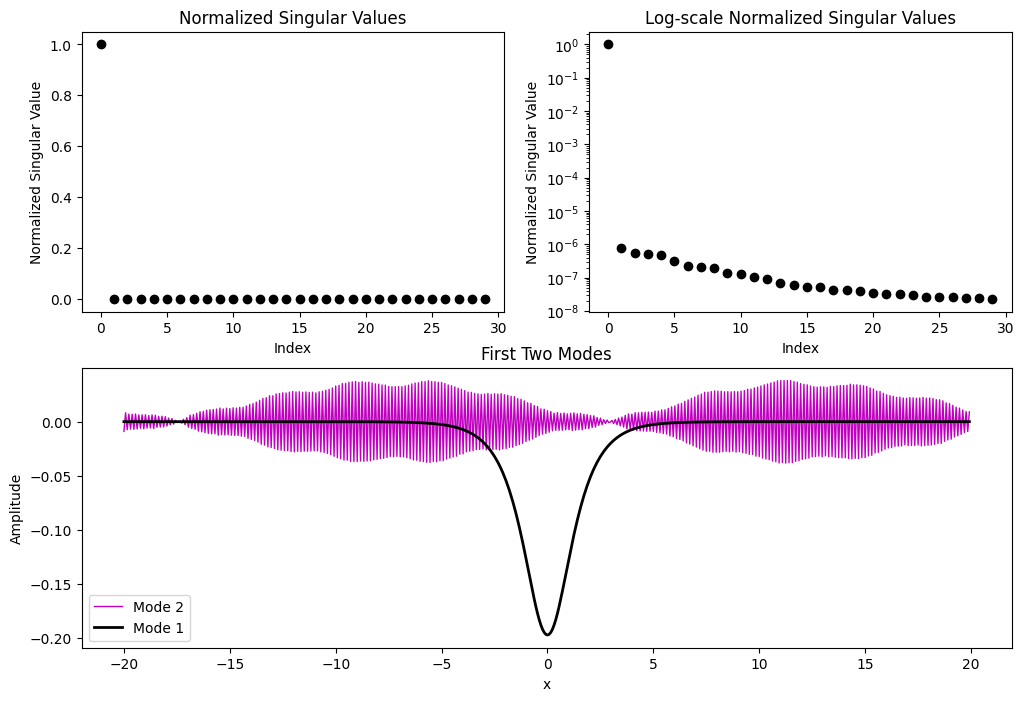

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Xdata = usol.T
u, s, v = np.linalg.svd(Xdata)
Sig = np.diag(s[:30])
U1 = u[:, :30]
np.save('U1.npy', U1)

# Plotting
plt.figure(2, figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(np.diag(Sig) / np.sum(Sig), 'ko')
plt.title('Normalized Singular Values')
plt.xlabel('Index')
plt.ylabel('Normalized Singular Value')

plt.subplot(2, 2, 2)
plt.semilogy(np.diag(Sig) / np.sum(Sig), 'ko')
plt.title('Log-scale Normalized Singular Values')
plt.xlabel('Index')
plt.ylabel('Normalized Singular Value')

plt.subplot(2, 1, 2)
plt.plot(x, U1[:, 1], 'm', linewidth=1, label='Mode 2')
plt.plot(x, U1[:, 0], 'k', linewidth=2, label='Mode 1')
plt.title('First Two Modes')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

plt.show()


In [3]:
N = 2
u = N * np.cosh(x)**(-1)
ut = np.fft.fft(u)
ut0= np.hstack([np.real(ut),np.imag(ut)])

utsol = odeint(nls_rhs, ut0, t, args=(k,n,))
usol = np.zeros((len(t), n), dtype=np.complex128)
usol2 = utsol[:,0:n] + 1j*utsol[:,n:]

for j in range(len(t)):
    usol[j, :] = np.fft.ifft(usol2[j, :])


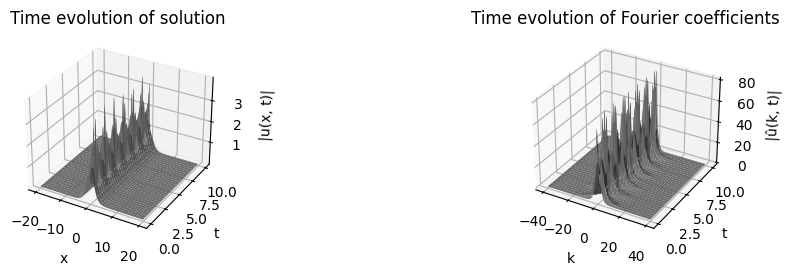

In [4]:
Xdata = usol.T
u, s, v = np.linalg.svd(Xdata)
Sig = np.diag(s[:30])
U2 = u[:, :30]
np.save('U2.npy', U2)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, np.abs(usol), color='gray')
ax1.set_title('Time evolution of solution')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('|u(x, t)|')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(K, T_fft, np.abs(np.fft.fftshift(usol2)), color='gray')
ax2.set_title('Time evolution of Fourier coefficients')
ax2.set_xlabel('k')
ax2.set_ylabel('t')
ax2.set_zlabel('|û(k, t)|')

plt.show()



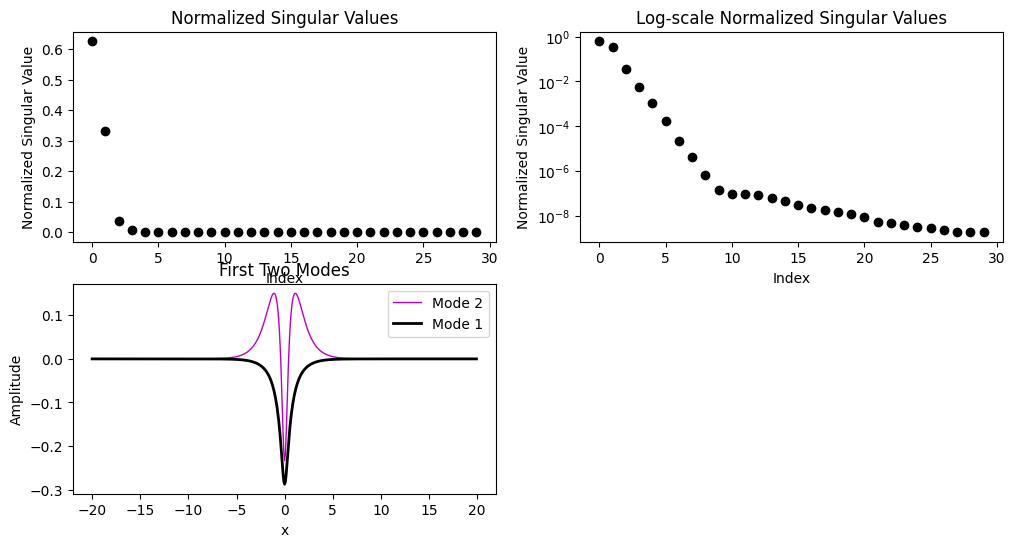

In [5]:
plt.figure(4, figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(np.diag(Sig) / np.sum(Sig), 'ko')
plt.title('Normalized Singular Values')
plt.xlabel('Index')
plt.ylabel('Normalized Singular Value')

plt.subplot(2, 2, 2)
plt.semilogy(np.diag(Sig) / np.sum(Sig), 'ko')
plt.title('Log-scale Normalized Singular Values')
plt.xlabel('Index')
plt.ylabel('Normalized Singular Value')

plt.subplot(2, 2, 3)
plt.plot(x, U2[:, 1], 'm', linewidth=1, label='Mode 2')
plt.plot(x, U2[:, 0], 'k', linewidth=2, label='Mode 1')
plt.title('First Two Modes')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

plt.show()